<a href="https://colab.research.google.com/github/Sheetal1326/EDA_da1/blob/main/EDA_da1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analytics Da-1**

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [51]:
# Load the dataset
df = pd.read_csv('exercise.csv')

In [52]:
# Dimensions of the dataset
print("Dimensions:", df.shape)

Dimensions: (15000, 8)


In [53]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
             User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  14999.000000  14999.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465698     74.964598     15.530600   
std    2.872851e+06     16.980264     14.258421     15.033590      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp  
count  14999.000000  15000.000000  
mean      95.520035     40.025400  
std        9.581883      0.779245  
min       67.000000     37.100000  
25%       88.000000     39.600000  
50%       96.000000     40.200000  
75%      103.0

In [54]:
# Data Types and Null Values
print("\nData Types and Null Values:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      14999 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      14999 non-null  float64
 4   Weight      14999 non-null  float64
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  14999 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 937.6+ KB

Data Types and Null Values:
 None


**Data Cleaning**

In [55]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 User_ID       0
Gender        1
Age           0
Height        1
Weight        1
Duration      0
Heart_Rate    1
Body_Temp     0
dtype: int64


In [56]:
#Handle missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
df['Heart_Rate'].fillna(df['Heart_Rate'].median(), inplace=True)

<ipython-input-56-ac53439fb173>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-56-ac53439fb173>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [57]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


In [58]:
# Removing duplicate records
df.drop_duplicates(inplace=True)

In [59]:
# Handling Outliers using Z-score
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

In [60]:
#Dimensions after data cleaning
print("Dimensions:", df.shape)

Dimensions: (14904, 8)


In [61]:
print(df.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0        29       105.0       40.8
1  14861698  female   20   166.0    60.0        14        94.0       40.3
2  11179863    male   69   179.0    79.0         5        88.0       38.7
3  16180408  female   34   179.0    71.0        13       100.0       40.5
4  17771927  female   27   154.0    58.0        10        81.0       39.8


**Univariate Analysis**

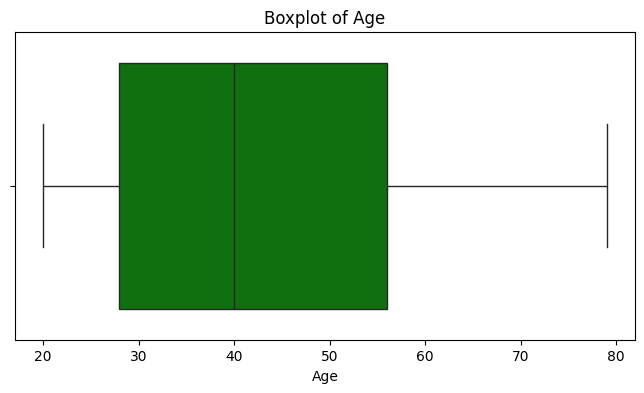

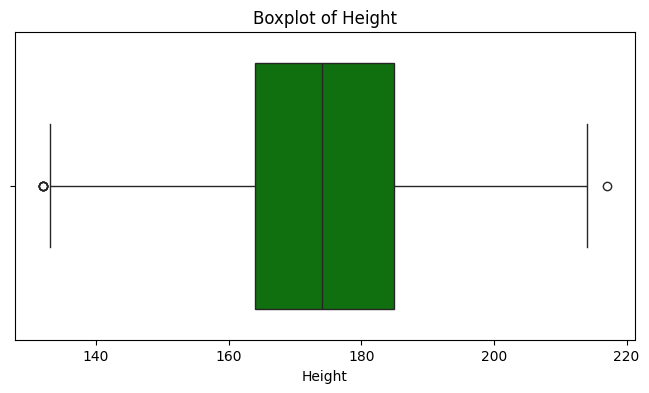

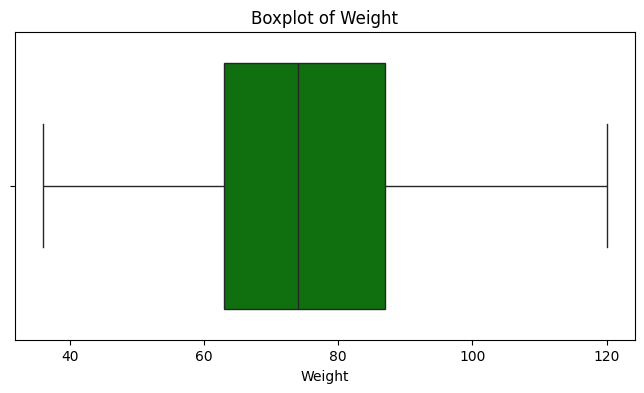

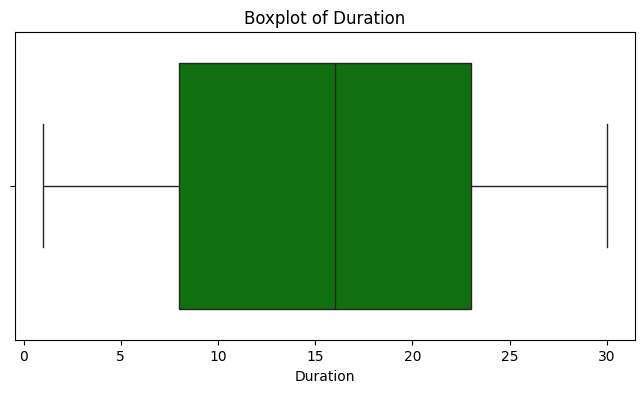

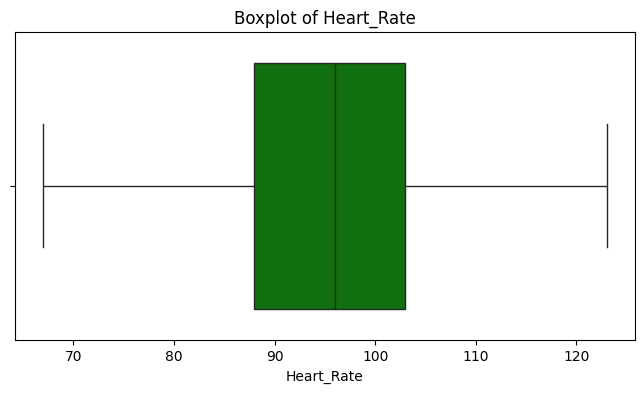

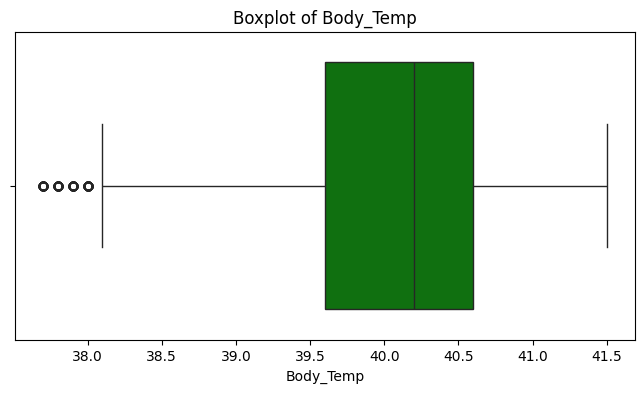

In [74]:
# Box plots for numerical columns
num_columns = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
for column in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column, color='green')
    plt.title(f'Boxplot of {column}')
    plt.show()

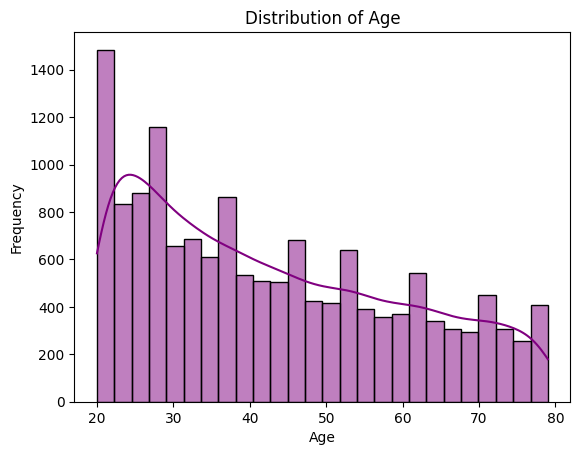

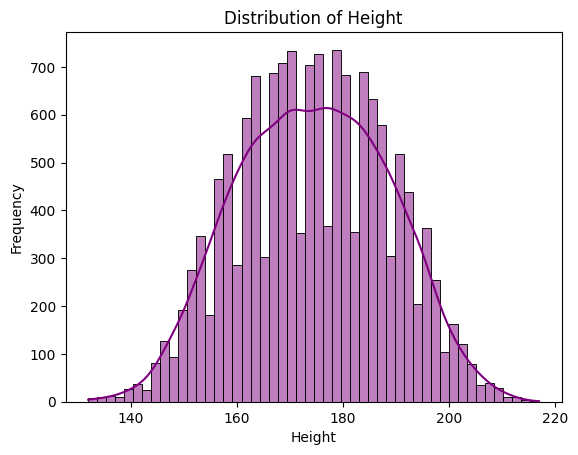

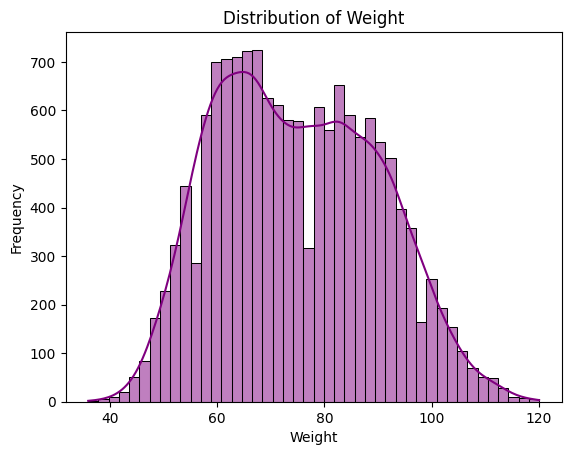

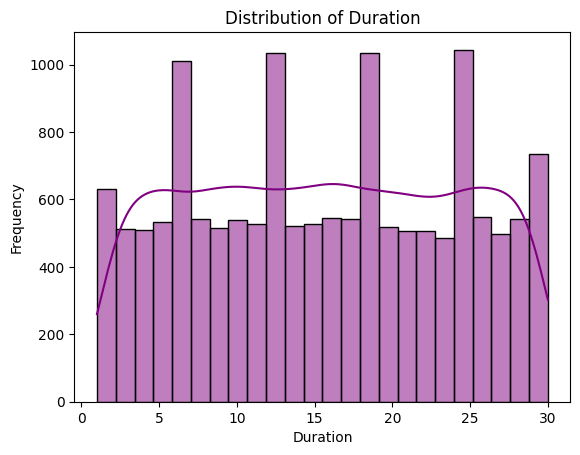

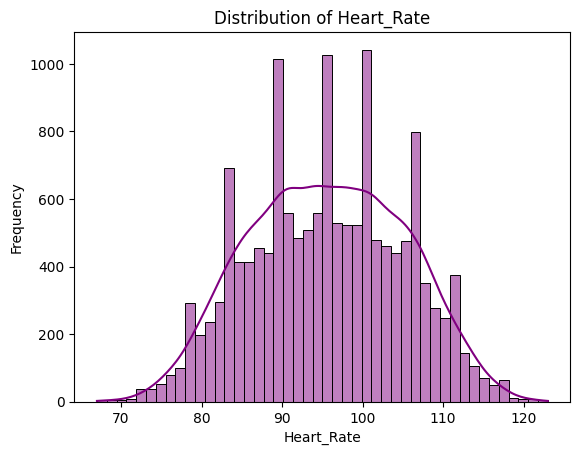

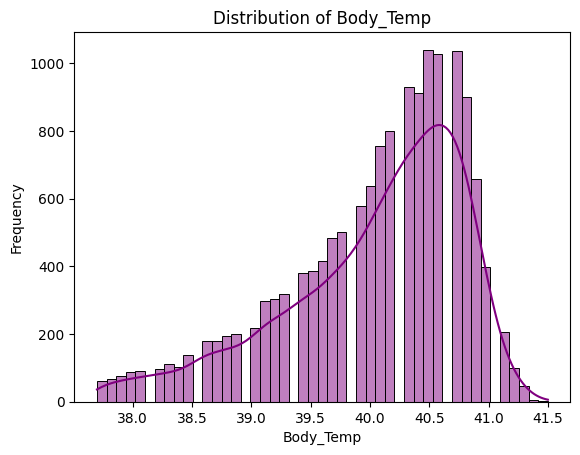

In [62]:
# Distribution plots
for column in ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']:
    plt.figure()
    sns.histplot(df[column], kde=True, color='purple')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

<ipython-input-75-fee281947714>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age_Group', palette='Set2')


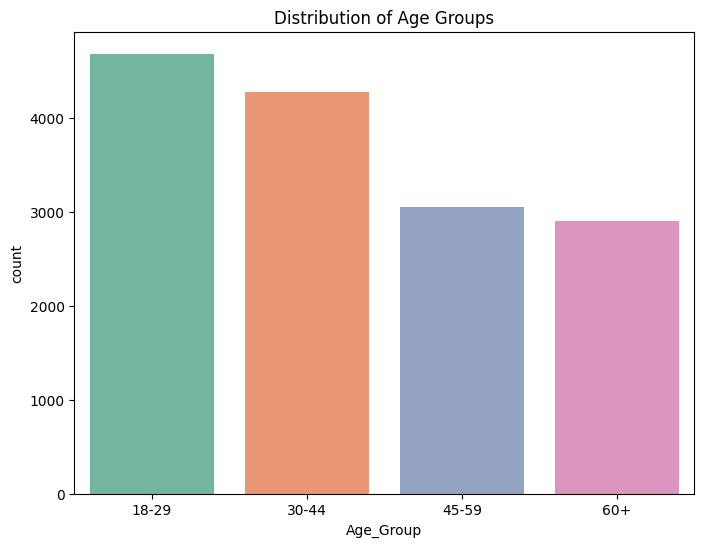

In [75]:
# Age groups distribution
age_bins = [18, 30, 45, 60, 80]
age_labels = ['18-29', '30-44', '45-59', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age_Group', palette='Set2')
plt.title('Distribution of Age Groups')
plt.show()

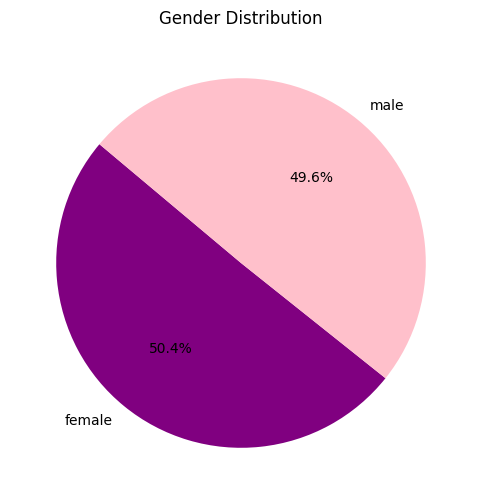

In [81]:
# Pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['purple','pink'])
plt.title('Gender Distribution')
plt.show()

**Bivariate Analysis**

<ipython-input-126-e33323b48078>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-126-e33323b48078>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




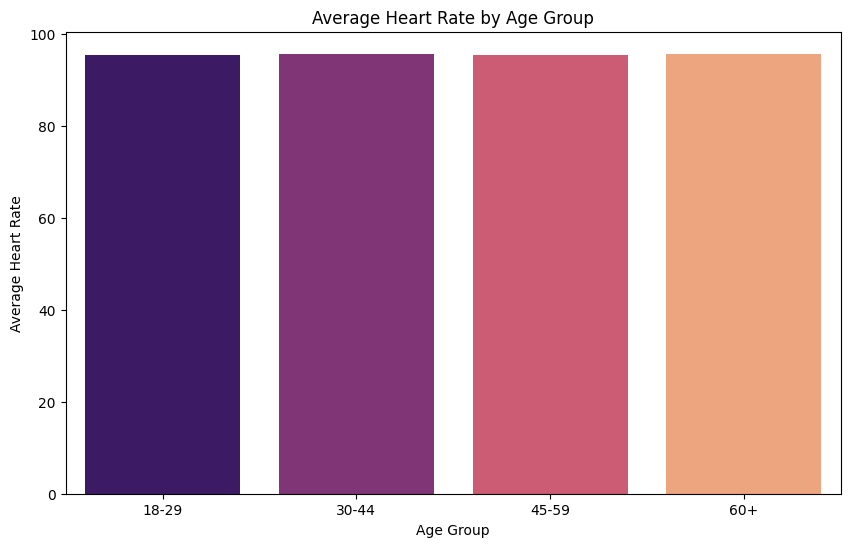

In [126]:
age_bins = [18, 30, 45, 60, 80]
age_labels = ['18-29', '30-44', '45-59', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calculate average Heart Rate for each Age Group
avg_heart_rate_age_group = df.groupby('Age_Group')['Heart_Rate'].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_heart_rate_age_group.index, y=avg_heart_rate_age_group.values, palette='magma')
plt.title("Average Heart Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Heart Rate")
plt.show()


<ipython-input-129-7c1852288ca4>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



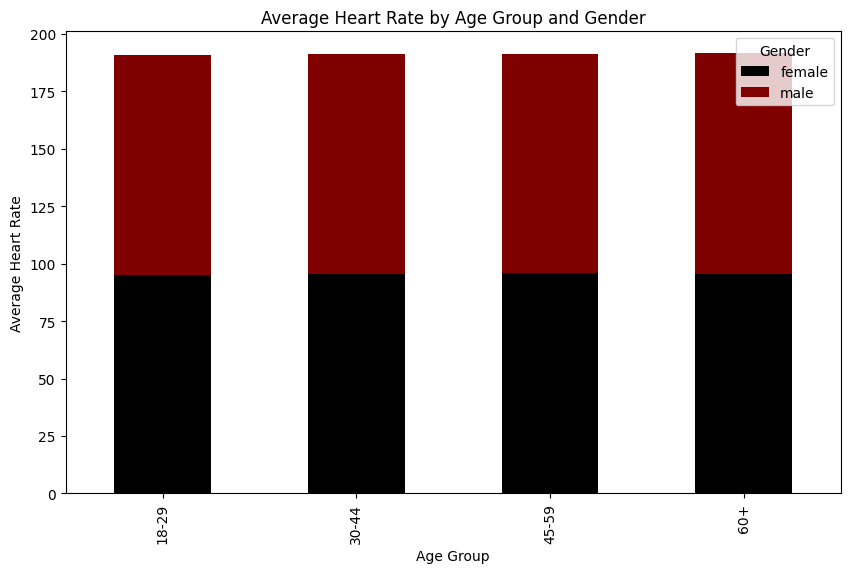

In [129]:
avg_heart_rate_age_gender = df.groupby(['Age_Group', 'Gender'])['Heart_Rate'].mean().unstack()

# Plot the stacked bar graph
avg_heart_rate_age_gender.plot(kind='bar', stacked=True, color=['black', 'maroon'], figsize=(10, 6))
plt.title("Average Heart Rate by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Heart Rate")
plt.legend(title='Gender')
plt.show()


<ipython-input-85-9b634fef403e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Heart_Rate', palette='viridis')


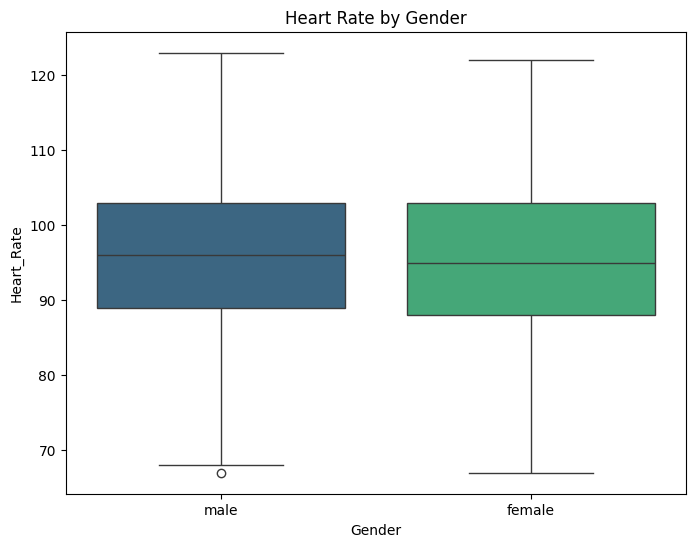

In [85]:
# Box plot of Heart Rate by Gender to analyze Heart Rate variation across genders
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Heart_Rate', palette='viridis')
plt.title('Heart Rate by Gender')
plt.show()

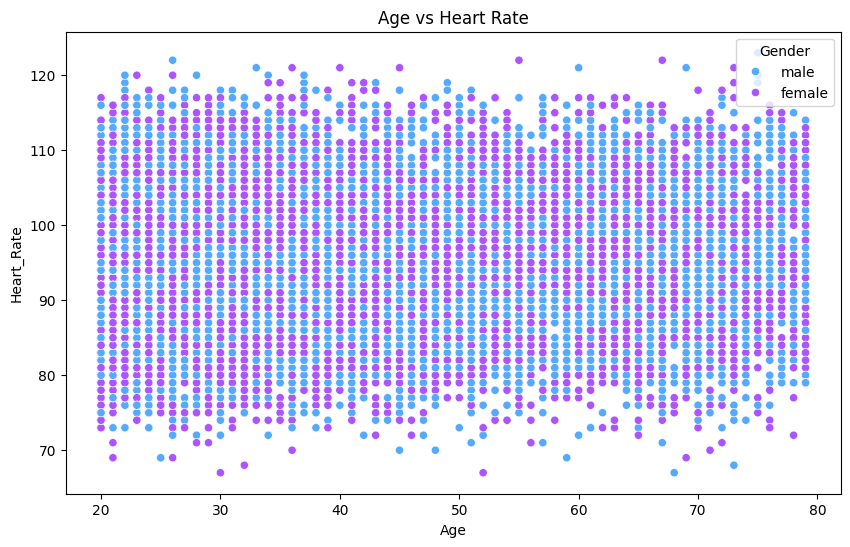

In [64]:
# Scatter plot between Age and Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Heart_Rate', hue='Gender', palette='cool')
plt.title('Age vs Heart Rate')
plt.show()

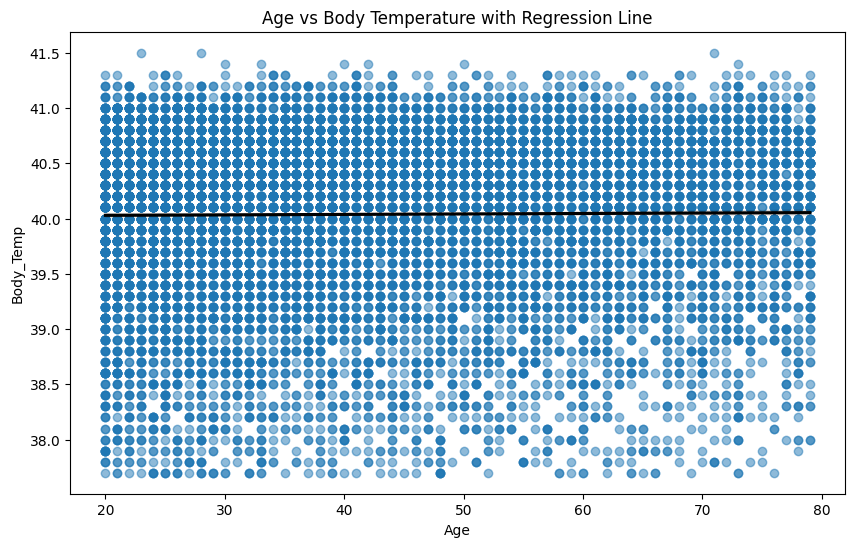

In [89]:
# Scatter plot with regression line for Age vs Body Temperature
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='Body_Temp', scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.title('Age vs Body Temperature with Regression Line')
plt.show()

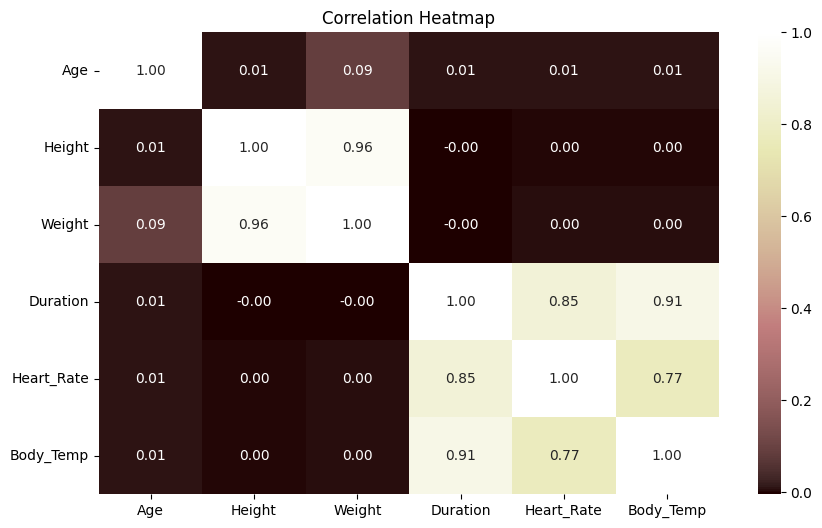

In [116]:
# Correlation heatmap
num_features = df.select_dtypes(include=np.number)
num_features = num_features.drop(columns=['User_ID'], errors='ignore')
plt.figure(figsize=(10, 6))
sns.heatmap(num_features.corr(), annot=True, cmap='pink', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-90-3f76e6ab0a8d>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='Duration', index='Age_Group', columns='Gender', aggfunc='mean')


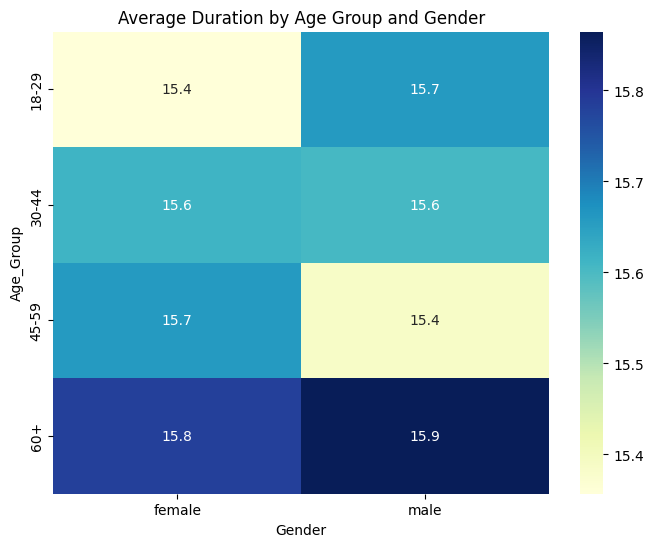

In [90]:
# Heatmap of average Duration by Age Group and Gender
pivot_table = df.pivot_table(values='Duration', index='Age_Group', columns='Gender', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Duration by Age Group and Gender')
plt.show()

**Multivariate Analysis**

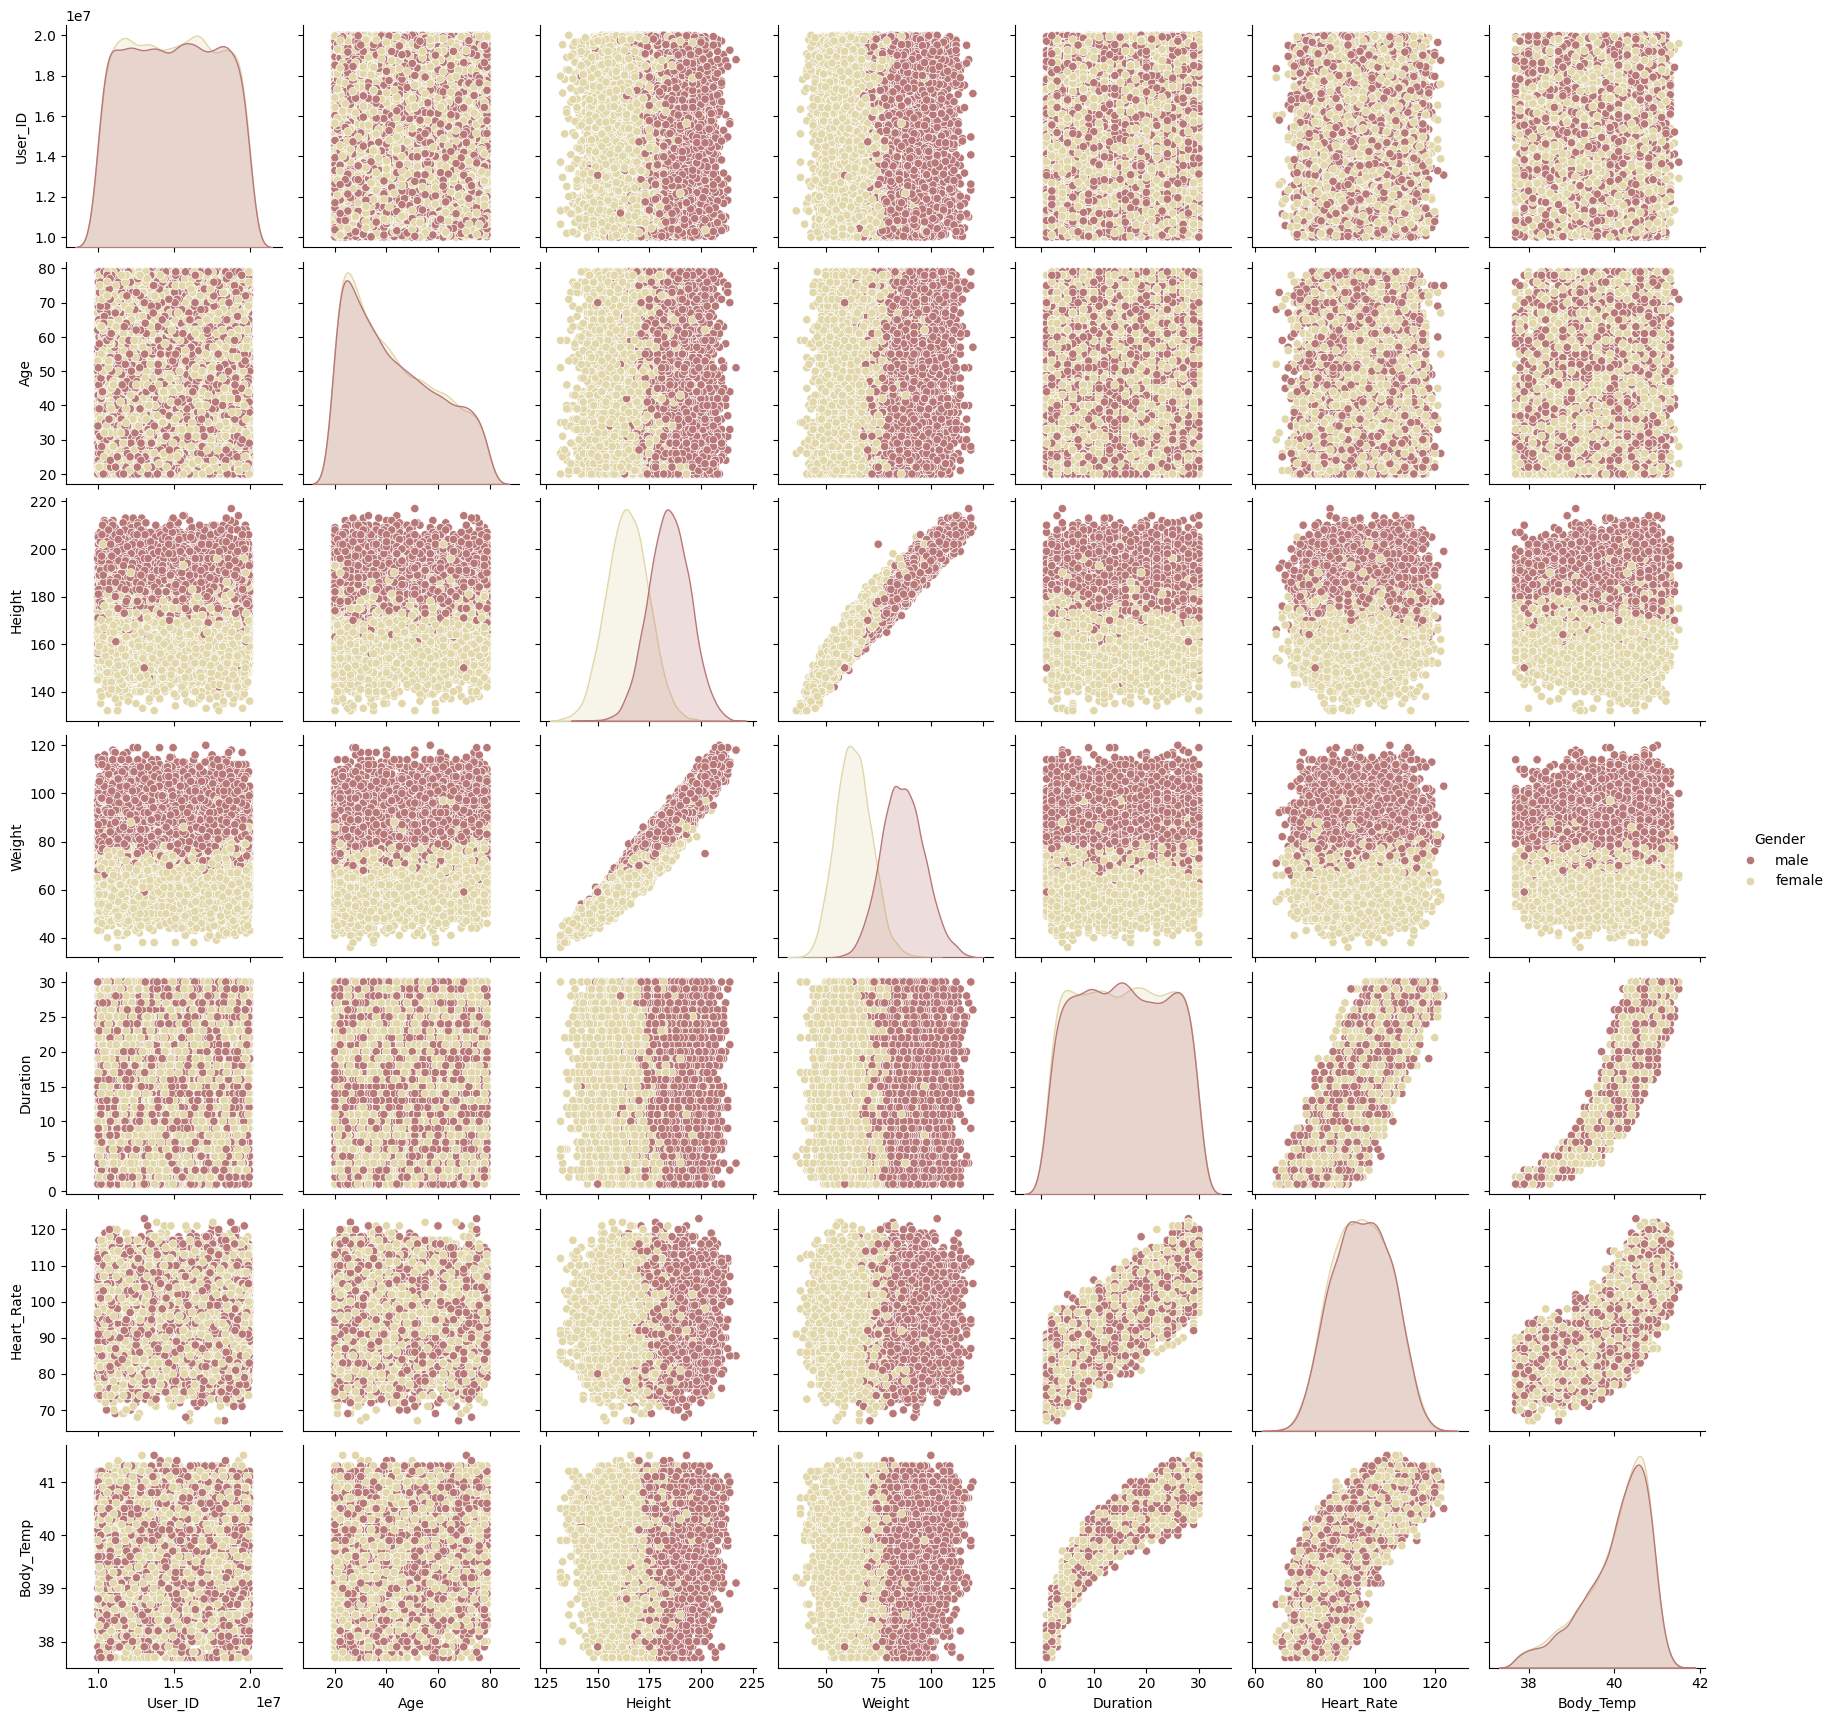

In [101]:
# Pairplot to examine relationships between numeric features
sns.pairplot(df, hue='Gender',palette='pink')
plt.show()

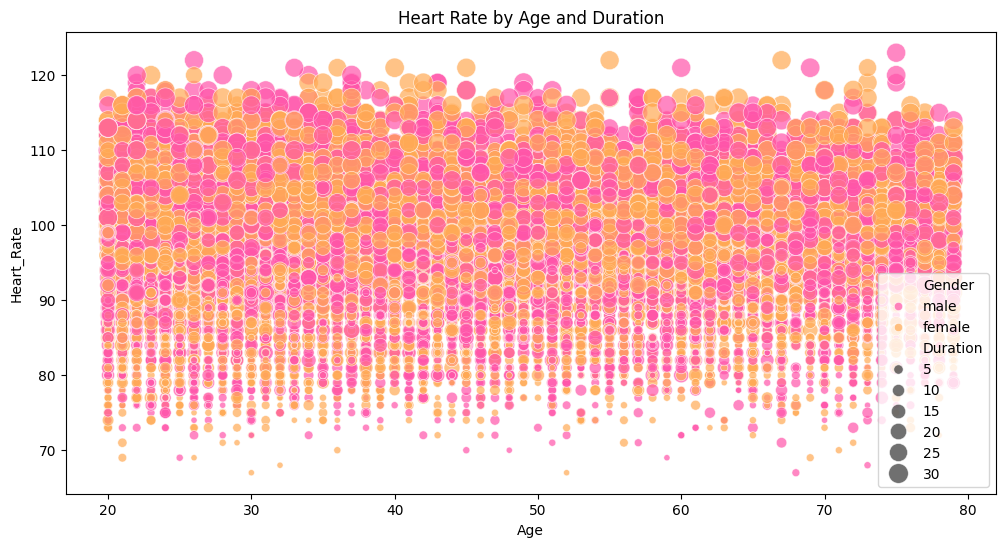

In [103]:
# Analysis of Heart Rate based on Age and Duration
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Heart_Rate', size='Duration', hue='Gender', sizes=(20, 200), alpha=0.7, palette='spring')
plt.title('Heart Rate by Age and Duration')
plt.show()

In [93]:
import plotly.express as px
from pandas.plotting import parallel_coordinates

#3D Scatter Plot of Age, Heart Rate, and Duration
fig = px.scatter_3d(df, x='Age', y='Heart_Rate', z='Duration', color='Gender',
                    title='3D Scatter Plot of Age, Heart Rate, and Duration')
fig.show()

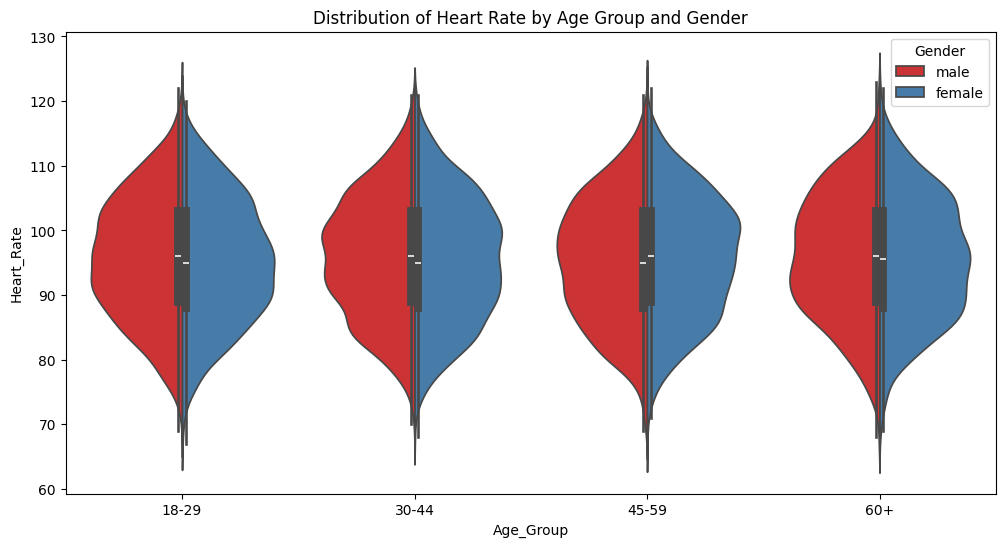

In [94]:
# Violin Plot of Heart Rate by Age Group and Gender
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Age_Group', y='Heart_Rate', hue='Gender', split=True, palette='Set1')
plt.title('Distribution of Heart Rate by Age Group and Gender')
plt.show()

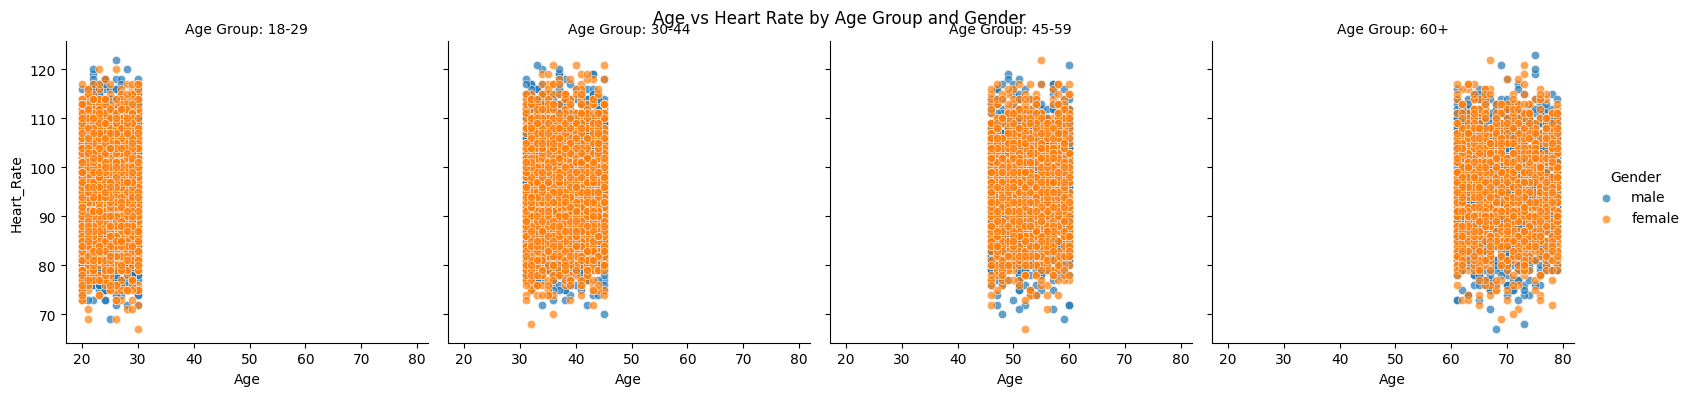

In [107]:
# Facet Grid for Age vs Heart Rate by Age Group and Gender
g = sns.FacetGrid(df, col='Age_Group', hue='Gender', height=4, aspect=1)
g.map(sns.scatterplot, 'Age', 'Heart_Rate', alpha=0.7)
g.add_legend()
g.set_titles('Age Group: {col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age vs Heart Rate by Age Group and Gender')
plt.show()

<ipython-input-96-1dd757257054>:6: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



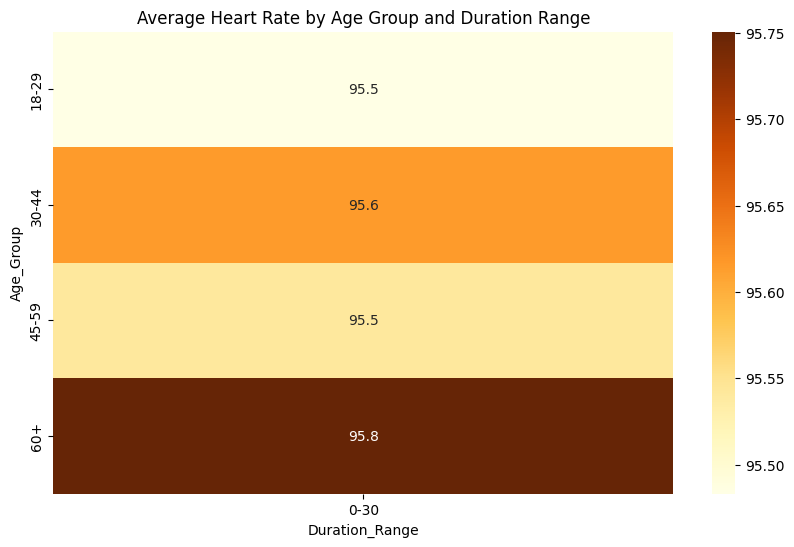

In [96]:
#Heatmap of Average Heart Rate by Age Group and Duration Range
duration_bins = [0, 30, 60, 90, 120]
duration_labels = ['0-30', '31-60', '61-90', '91-120']
df['Duration_Range'] = pd.cut(df['Duration'], bins=duration_bins, labels=duration_labels)

pivot_table = df.pivot_table(values='Heart_Rate', index='Age_Group', columns='Duration_Range', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlOrBr', fmt=".1f")
plt.title('Average Heart Rate by Age Group and Duration Range')
plt.show()


<ipython-input-98-0bd71a7b9b9a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



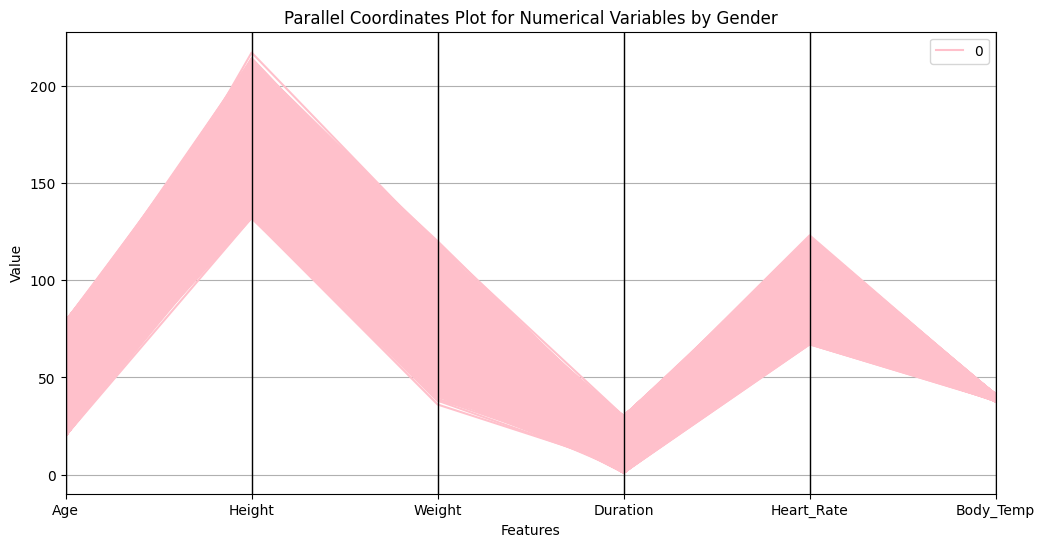

In [98]:
# Parallel Coordinates Plot for Numerical Variables
subset_df = df[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
subset_df['Gender'] = subset_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

plt.figure(figsize=(12, 6))
parallel_coordinates(subset_df, class_column='Gender', color=['pink', 'red'])
plt.title('Parallel Coordinates Plot for Numerical Variables by Gender')
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()

**1-D Statistical Analysis**

In [110]:
#stats for each column
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['User_ID'], errors='ignore')
for column in df_numeric.select_dtypes(include=[np.number]).columns:
    print(f"\n{column} Analysis:")
    print("Mean:", df_numeric[column].mean())
    print("Median:", df_numeric[column].median())
    print("Mode:", df_numeric[column].mode()[0])
    print("Variance:", df_numeric[column].var())
    print("Standard Deviation:", df_numeric[column].std())
    print("Range:", df_numeric[column].max() - df_numeric[column].min())
    print("Skewness:", df_numeric[column].skew())
    print("Kurtosis:", df_numeric[column].kurtosis())


Age Analysis:
Mean: 42.79817498658078
Median: 40.0
Mode: 20
Variance: 288.311810397883
Standard Deviation: 16.979747065191606
Range: 59
Skewness: 0.4726585895580739
Kurtosis: -0.9496524378459621

Height Analysis:
Mean: 174.4367596415535
Median: 174.0
Mode: 179.0
Variance: 201.53151345162195
Standard Deviation: 14.196179537172032
Range: 85.0
Skewness: -0.012575276904014847
Kurtosis: -0.5545880154059453

Weight Analysis:
Mean: 74.92860739382984
Median: 74.0
Mode: 66.0
Variance: 223.72448748526656
Standard Deviation: 14.957422488024685
Range: 84.0
Skewness: 0.20837721853278365
Kurtosis: -0.7430834525773964

Duration Analysis:
Mean: 15.600979602791197
Median: 16.0
Mode: 26
Variance: 68.4652771722335
Standard Deviation: 8.274374729986157
Range: 29
Skewness: 0.005574219250178363
Kurtosis: -1.1846317999170897

Heart_Rate Analysis:
Mean: 95.58527911969941
Median: 96.0
Mode: 91.0
Variance: 90.96649065549808
Standard Deviation: 9.537635485564442
Range: 56.0
Skewness: -0.015669441583000484
Kurto

<ipython-input-125-de4e3d90d9e9>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




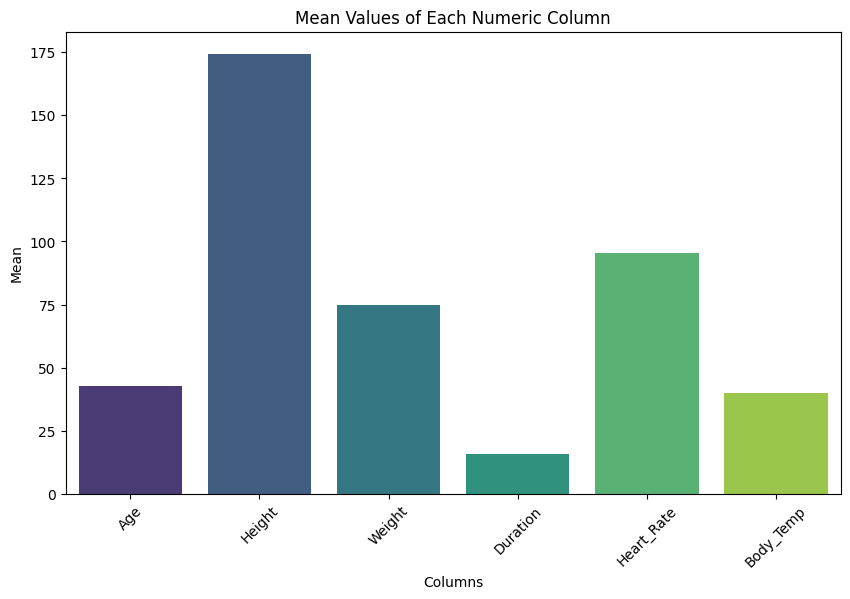

In [125]:
mean_values = df_numeric.mean()

# Plot a bar graph of mean values
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_values.index, y=mean_values.values, palette='viridis')
plt.title("Mean Values of Each Numeric Column")
plt.xlabel("Columns")
plt.ylabel("Mean")
plt.xticks(rotation=45)
plt.show()

**2-D Statistical Analysis**

In [112]:
# Correlation matrix
numerical_features = df.select_dtypes(include=np.number)
numerical_features = numerical_features.drop(columns=['User_ID'], errors='ignore')
correlation_matrix = numerical_features.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                  Age    Height    Weight  Duration  Heart_Rate  Body_Temp
Age         1.000000  0.007652  0.088218  0.010874    0.008481   0.009263
Height      0.007652  1.000000  0.958151 -0.004162    0.000927   0.001812
Weight      0.088218  0.958151  1.000000 -0.001989    0.004151   0.003751
Duration    0.010874 -0.004162 -0.001989  1.000000    0.851749   0.906125
Heart_Rate  0.008481  0.000927  0.004151  0.851749    1.000000   0.773382
Body_Temp   0.009263  0.001812  0.003751  0.906125    0.773382   1.000000


In [118]:
# Covariance matrix
numerical_features = df.select_dtypes(include=np.number)
numerical_features = numerical_features.drop(columns=['User_ID'], errors='ignore')
correlation_matrix = numerical_features.cov()
print("\nCovariance Matrix:\n", correlation_matrix)


Covariance Matrix:
                    Age      Height      Weight   Duration  Heart_Rate  \
Age         288.311810    1.844392   22.405053   1.527796    1.373517   
Height        1.844392  201.531513  203.452138  -0.488855    0.125469   
Weight       22.405053  203.452138  223.724487  -0.246207    0.592232   
Duration      1.527796   -0.488855   -0.246207  68.465277   67.218322   
Heart_Rate    1.373517    0.125469    0.592232  67.218322   90.966491   
Body_Temp     0.119455    0.019532    0.042615   5.694454    5.602260   

            Body_Temp  
Age          0.119455  
Height       0.019532  
Weight       0.042615  
Duration     5.694454  
Heart_Rate   5.602260  
Body_Temp    0.576843  


In [119]:
# Chi-Square test for categorical variables (Gender and Age_Group)
age_bins = [18, 30, 45, 60, 80]
age_labels = ['18-29', '30-44', '45-59', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Gender'], df['Age_Group'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test for Gender vs Age Group:")
print("Chi2:", chi2, "p-value:", p)


Chi-Square Test for Gender vs Age Group:
Chi2: 0.3906339057462097 p-value: 0.9421704422050872


**Contigency Tables**

In [120]:
contingency_table = pd.crosstab(df['Gender'], df['Age_Group'])
print("\nContingency Table for Gender and Age Group:\n", contingency_table)

# Contingency table for Age Group and Duration Range
duration_bins = [0, 30, 60, 90, 120]
duration_labels = ['0-30', '31-60', '61-90', '91-120']
df['Duration_Range'] = pd.cut(df['Duration'], bins=duration_bins, labels=duration_labels)

contingency_table_duration = pd.crosstab(df['Age_Group'], df['Duration_Range'])
print("\nContingency Table for Age Group and Duration Range:\n", contingency_table_duration)



Contingency Table for Gender and Age Group:
 Age_Group  18-29  30-44  45-59   60+
Gender                              
female      2376   2142   1535  1458
male        2305   2129   1513  1446

Contingency Table for Age Group and Duration Range:
 Duration_Range  0-30
Age_Group           
18-29           4681
30-44           4271
45-59           3048
60+             2904


**N-D Statistical Analysis**

In [121]:
# Grouping by multiple dimensions and calculating means
multi_dim_group = df.groupby(['Gender', 'Age_Group', 'Duration_Range'])['Heart_Rate'].mean().unstack()
print("\nAverage Heart Rate by Gender, Age Group, and Duration Range:\n", multi_dim_group)


Average Heart Rate by Gender, Age Group, and Duration Range:
 Duration_Range         0-30  31-60  61-90  91-120
Gender Age_Group                                 
female 18-29      95.292508    NaN    NaN     NaN
       30-44      95.415966    NaN    NaN     NaN
       45-59      95.751792    NaN    NaN     NaN
       60+        95.612483    NaN    NaN     NaN
male   18-29      95.679826    NaN    NaN     NaN
       30-44      95.816815    NaN    NaN     NaN
       45-59      95.328486    NaN    NaN     NaN
       60+        95.890041    NaN    NaN     NaN


<ipython-input-121-95c9a1676ba8>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [122]:
# Multi-dimensional pivot table for analysis
pivot_table_nd = df.pivot_table(values='Body_Temp', index=['Gender', 'Age_Group'], columns='Duration_Range', aggfunc='mean')
print("\nPivot Table of Average Body Temperature by Gender, Age Group, and Duration Range:\n", pivot_table_nd)


Pivot Table of Average Body Temperature by Gender, Age Group, and Duration Range:
 Duration_Range         0-30
Gender Age_Group           
female 18-29      40.016288
       30-44      40.034734
       45-59      40.040717
       60+        40.049177
male   18-29      40.045640
       30-44      40.047675
       45-59      40.012161
       60+        40.067151


<ipython-input-122-bf6ea01edac0>:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [123]:
# ANOVA (Analysis of Variance) - examining the effect of multiple categorical variables on Heart Rate
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA using Gender, Age_Group, and Duration_Range as factors for Heart Rate
anova_df = df.dropna(subset=['Age_Group', 'Duration_Range'])  # Drop NaNs in Age_Group and Duration_Range
model = ols('Heart_Rate ~ C(Gender) + C(Age_Group) + C(Duration_Range)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table for Heart Rate with Gender, Age Group, and Duration Range as Factors:\n", anova_table)


ANOVA Table for Heart Rate with Gender, Age Group, and Duration Range as Factors:
                          sum_sq       df        F    PR(>F)
C(Gender)          1.550814e+02      1.0  1.70473  0.191691
C(Age_Group)       1.367870e+02      3.0  0.50121  0.681439
C(Duration_Range)           NaN      3.0      NaN       NaN
Residual           1.355381e+06  14899.0      NaN       NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning:

invalid value encountered in divide



**Hierarchical Clustering**

<ipython-input-3-ac32342a2b31>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_numeric.fillna(method='ffill', inplace=True)


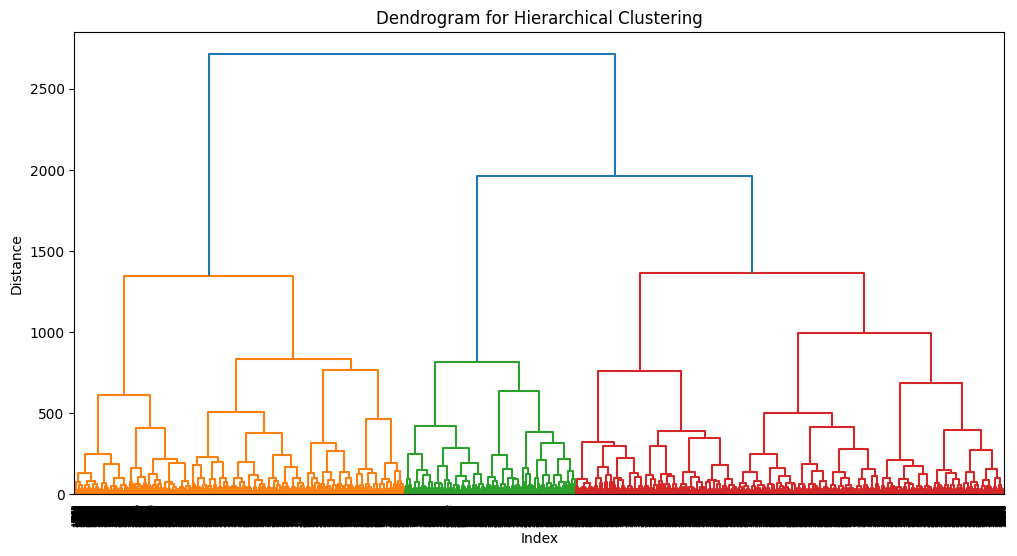


Hierarchical Clustering Results:
Cluster_HC
3             6913
1             5325
2             2762
Name: count, dtype: int64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

df = pd.read_csv('exercise.csv')
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['User_ID'], errors='ignore')

df_numeric.fillna(method='ffill', inplace=True)

# Perform hierarchical clustering
Z = linkage(df_numeric, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df_numeric.index)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

max_clusters = 3
clusters_hc = fcluster(Z, max_clusters, criterion='maxclust')

df['Cluster_HC'] = clusters_hc
print("\nHierarchical Clustering Results:")
print(df[['Cluster_HC']].value_counts())


**Principal Component Analysis(PCA)**

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('exercise.csv')
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['User_ID'], errors='ignore')
df_numeric.fillna(method='ffill', inplace=True)

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

<ipython-input-5-8c251b3e95e5>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_numeric.fillna(method='ffill', inplace=True)


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.44766767 0.3272636 ]


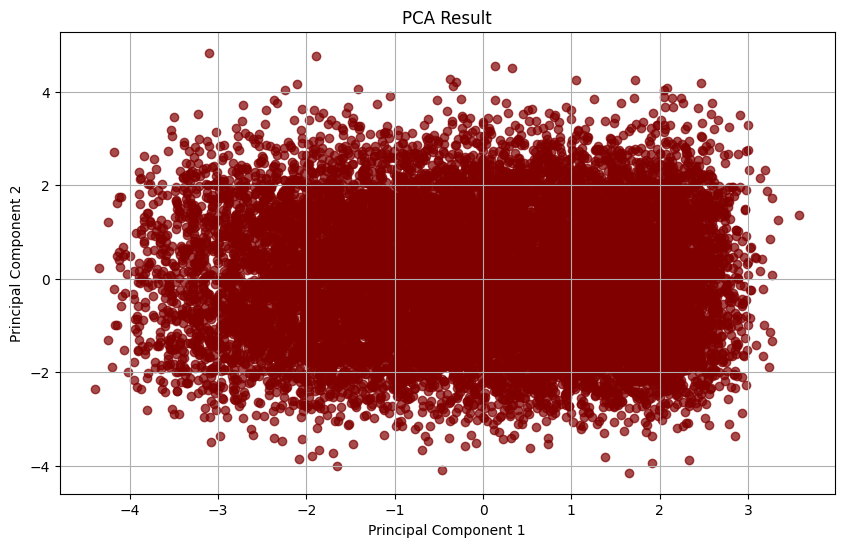

In [8]:
import matplotlib.pyplot as plt

# Plotting the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.7, color='maroon')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


**Self-Organized Maps**

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('exercise.csv')
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['User_ID'], errors='ignore')

df_numeric.fillna(method='ffill', inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

<ipython-input-12-3b2d1677b749>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_numeric.fillna(method='ffill', inplace=True)


In [13]:
from minisom import MiniSom
import matplotlib.pyplot as plt

# Define SOM dimensions
som_dim = 5
som = MiniSom(som_dim, som_dim, df_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Train SOM
som.train(df_scaled, num_iteration=1000)
weights = som.get_weights()


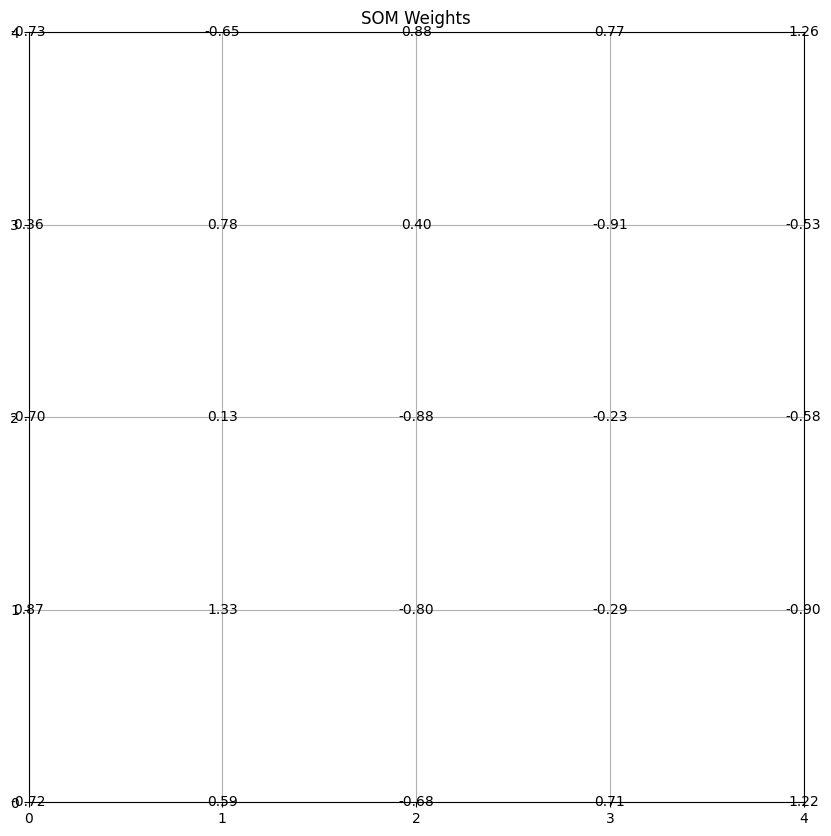

In [14]:
# Plotting the SOM weights
plt.figure(figsize=(10, 10))
for i in range(som_dim):
    for j in range(som_dim):
        plt.text(i, j, f'{weights[i, j, 0]:.2f}', ha='center', va='center', fontsize=10)
plt.title('SOM Weights')
plt.xticks(range(som_dim))
plt.yticks(range(som_dim))
plt.grid()
plt.show()


**K-Means Clustering**

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

df = pd.read_csv('exercise.csv')
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['User_ID'], errors='ignore')
df_numeric.fillna(method='ffill', inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


<ipython-input-23-4e8a82a2c6dd>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_numeric.fillna(method='ffill', inplace=True)


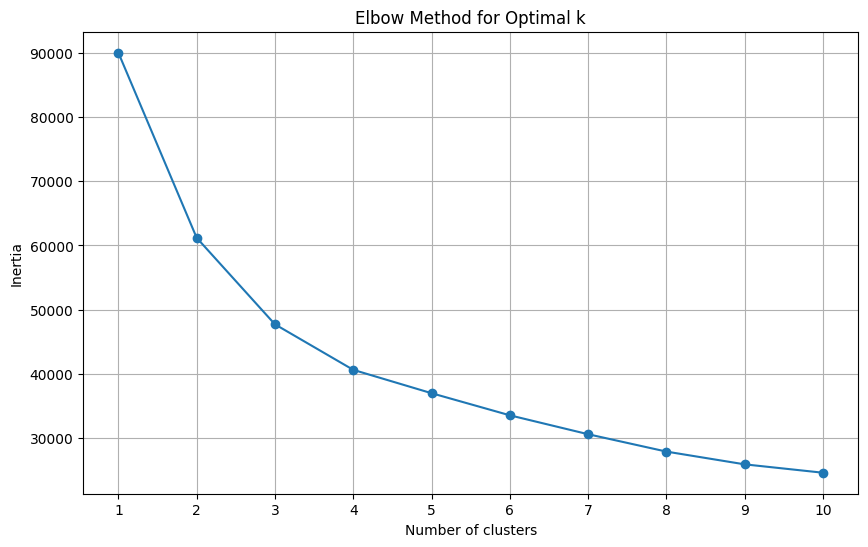

In [24]:
# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.xticks(K)
plt.show()


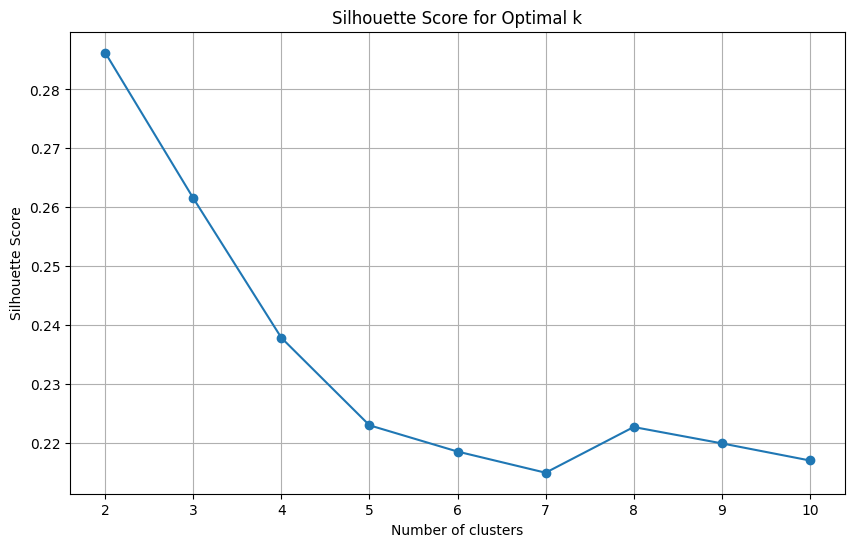

In [25]:
# Silhouette score to find the optimal number of clusters
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.xticks(K)
plt.show()


In [35]:
# Apply K-Means clustering with the optimal number of clusters
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters
print(df[['Cluster']].value_counts())


Cluster
1          8428
0          6572
Name: count, dtype: int64


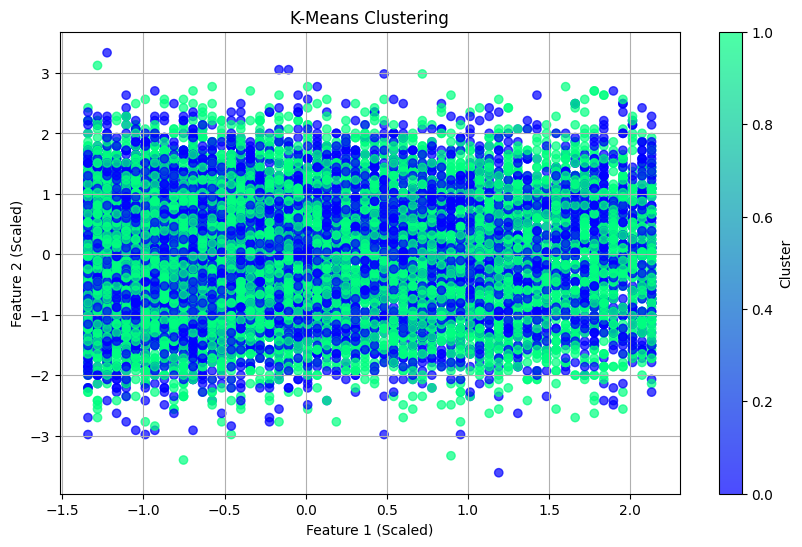

In [39]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters, cmap='winter', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


**KNN**

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('exercise.csv')
df = df.drop(columns=['User_ID'], errors='ignore')
imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=[np.number]).columns] = imputer.fit_transform(df.select_dtypes(include=[np.number]))

X = df.drop(columns=['Heart_Rate'])
y = df['Heart_Rate']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[['Gender']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender']))
X_encoded = pd.concat([X.drop(columns=['Gender']), encoded_df], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

k = 5
knn = KNeighborsRegressor(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f"- KNN Regressor with k={k} -")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


- KNN Regressor with k=5 -
Mean Squared Error: 30.35536
R-squared: 0.6807396831471225


**Supervised Learning**

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('exercise.csv')
df = df.drop(columns=['User_ID'], errors='ignore')
imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=[np.number]).columns] = imputer.fit_transform(df.select_dtypes(include=[np.number]))

X = df.drop(columns=['Heart_Rate'])
X = pd.get_dummies(X, columns=['Gender'], drop_first=True) # One-hot encoding for 'Gender'
y = df['Heart_Rate']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score # Import regression metrics
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

# Train models and print evaluation metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

     # Print evaluation metrics - Use regression metrics
    print(f"--- {model_name} ---")
    print("R-squared:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


--- Linear Regression ---
R-squared: 0.7356439652045701
Mean Squared Error: 25.135045543683184
--- Decision Tree Regressor ---
R-squared: 0.4239583899735908
Mean Squared Error: 54.7701969969202
--- Random Forest Regressor ---
R-squared: 0.7034778946772828
Mean Squared Error: 28.19340450375133
